In [ ]:
!pip install piexif

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import piexif
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS
import json
import random
from google.colab.patches import cv2_imshow


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/Shared drives/vertani-datasets/SoilDetectionDataset/train'
validation_dir = '/content/drive/Shared drives/vertani-datasets/SoilDetectionDataset/validation'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 301 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    verbose=1
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.7660 - loss: 1.0371 - val_accuracy: 0.2222 - val_loss: 1.3844
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7805 - loss: 0.4125 - val_accuracy: 0.8000 - val_loss: 0.6323
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8265 - loss: 0.3671 - val_accuracy: 0.4222 - val_loss: 0.7278
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.8672 - loss: 0.2641 - val_accuracy: 0.8222 - val_loss: 0.4685
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9629 - loss: 0.1291 - val_accuracy: 0.8000 - val_loss: 0.5383
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9784 - loss: 0.0702 - val_accuracy: 0.8222 - val_loss: 0.3641
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9803 - loss: 0.0424 - val_accuracy: 0.7778 - val_loss: 0.6030
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9870 - loss: 0.0772 - val_accuracy: 0.7778 - val_loss: 0.7863
Epo

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy:.2f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.8338 - loss: 0.4496
Validation accuracy: 0.84


In [ ]:
model.save('/content/drive/Shared drives/vertani-datasets/SoilDetectionDataset/Soil_detection_model.h5')

In [ ]:
model_json = model.to_json()
with open('/content/drive/Shared drives/vertani-datasets/soil_detection_model.json', 'w') as file:
    file.write(model_json)

model.save_weights('/content/drive/Shared drives/vertani-datasets/soil_detection_model.weights.h5')

In [ ]:
h5_model_path = '/content/drive/Shared drives/vertani-datasets/SoilDetectionDataset/soil_detection_model.h5'

tflite_model_path = '/content/drive/Shared drives/vertani-datasets/soil_detection_model.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(tf.keras.models.load_model(h5_model_path))
tflite_model = converter.convert()

with open(tflite_model_path, 'wb') as file:
    file.write(tflite_model)

Saved artifact at '/tmp/tmpqzr437e3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139931379348960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139931052820960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139931052832752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139931052902000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139931052912736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139931052910800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139931052901120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139931379347904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139931052820784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139931052819904: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
model = tf.keras.models.load_model('/content/drive/Shared drives/vertani-datasets/SoilDetectionDataset/soil_detection_model.h5')

In [ ]:
img_path = '/content/drive/Shared drives/vertani-datasets/test/test1.jpg'
img = load_img(img_path, target_size=(150, 150))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
prediction = model.predict(img_array)
print(prediction)
# if prediction[0][0] > 0.5:
#     print("Soil detected!")
# else:
#     print("No Soil Detected!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
[[0.9742813]]


Percentage of soil area: 11.69%


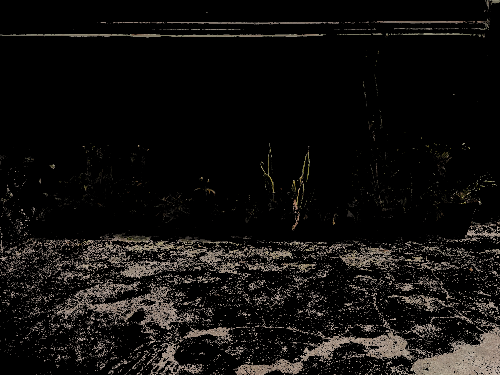

In [ ]:
original_img = cv2.imread(img_path)

hsv_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2HSV)

lower_bound = np.array([10, 30, 20])
upper_bound = np.array([30, 255, 200])

soil_mask = cv2.inRange(hsv_img, lower_bound, upper_bound)
soil_area = cv2.bitwise_and(original_img, original_img, mask=soil_mask)

soil_pixel_count = cv2.countNonZero(soil_mask)
total_pixel_count = soil_mask.size
soil_percentage = (soil_pixel_count / total_pixel_count) * 100
soil_percentage = round((soil_pixel_count / total_pixel_count) * 100, 2)
print(f"Percentage of soil area: {soil_percentage:.2f}%")

max_width = 500
max_height = 500

height, width = original_img.shape[:2]

if width > max_width or height > max_height:
    aspect_ratio = width / height
    if aspect_ratio > 1:
        new_width = max_width
        new_height = int(new_width / aspect_ratio)
    else:
        new_height = max_height
        new_width = int(new_height * aspect_ratio)
    resized_img = cv2.resize(soil_area, (new_width, new_height))
else:
    resized_img = soil_area

cv2_imshow(resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
def get_lat_long(img_path):
    try:
        image = Image.open(img_path)
        exif_data = image._getexif()

        if exif_data is not None:
            gps_info = None
            for tag, value in exif_data.items():
                if TAGS.get(tag) == 'GPSInfo':
                    gps_info = value
                    break

            if gps_info is not None:
                gps_data = {}
                for key in gps_info:
                    if key in GPSTAGS:
                        gps_data[GPSTAGS[key]] = gps_info[key]

                latitude = None
                longitude = None

                if 'GPSLatitude' in gps_data and 'GPSLatitudeRef' in gps_data:
                    lat = gps_data['GPSLatitude']
                    lat_ref = gps_data['GPSLatitudeRef']
                    latitude = convert_to_degrees(lat)
                    if lat_ref != 'N':
                        latitude = -latitude

                if 'GPSLongitude' in gps_data and 'GPSLongitudeRef' in gps_data:
                    lon = gps_data['GPSLongitude']
                    lon_ref = gps_data['GPSLongitudeRef']
                    longitude = convert_to_degrees(lon)
                    if lon_ref != 'E':
                        longitude = -longitude

                return latitude, longitude
            else:
                print("GPSInfo not found in the metadata.")
        else:
            print("No EXIF data found.")
    except Exception as e:
        print(f"Error: {e}")

    return None, None

def convert_to_degrees(value):
    """Convert the GPS coordinates to degrees."""
    d = value[0]
    m = value[1]
    s = value[2]
    return d + (m / 60.0) + (s / 3600.0)

latitude, longitude = get_lat_long(img_path)
if latitude is not None and longitude is not None:
    print(f'Latitude: {latitude}, Longitude: {longitude}')
else:
    print('Latitude and Longitude data not available')

Latitude: -7.023744444444445, Longitude: 107.54787777777777


In [ ]:
import requests

def get_elevation(lat, lon):
    url = f"https://api.open-meteo.com/v1/elevation?latitude={lat}&longitude={lon}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        elevation = data["elevation"][0]
        return elevation
    except requests.exceptions.RequestException as req_err:
        print(f"HTTP Request error: {req_err}")
    except KeyError:
        print("Error parsing response: 'elevation' key not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    return None

elevation = get_elevation(latitude, longitude)
if elevation is not None:
    print(f"Elevasi lokasi Anda: {elevation} meter")
else:
    print("Gagal mendapatkan elevasi lokasi.")


Elevasi lokasi Anda: 671.0 meter


In [ ]:
dataset_path = '/content/drive/Shared drives/vertani-datasets/PlantRecomendationDatasets/new_vegetables_v2.csv'
image_folder = '/content/drive/Shared drives/vertani-datasets/PlantRecomendationDatasets/Plant-images'

Based on the photo you uploaded, you have a plantable area of 11.69% and an altitude of 671.0 MDPL.

Here are our plant recommendations that can fit your circumstances:

- Daun Bawang


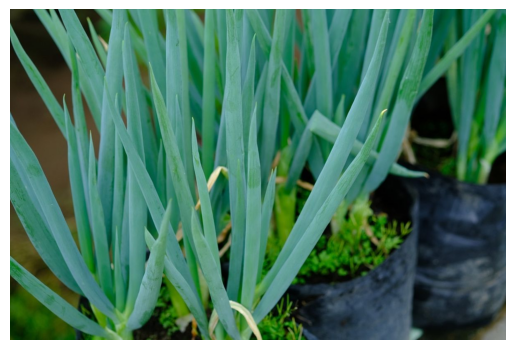

Daun bawang adalah tanaman yang mudah tumbuh di berbagai ketinggian, dari dataran rendah hingga tinggi. Tanaman ini sering digunakan sebagai bumbu masakan karena aromanya yang khas. Untuk menanam daun bawang, siapkan tanah yang gembur dengan pH netral, tambahkan pupuk organik, dan pastikan lokasi mendapat sinar matahari cukup. Siram tanaman secara teratur untuk menjaga kelembapan tanah, dan lakukan pemangkasan daun secara berkala untuk mempercepat pertumbuhan tunas baru.

- Selada


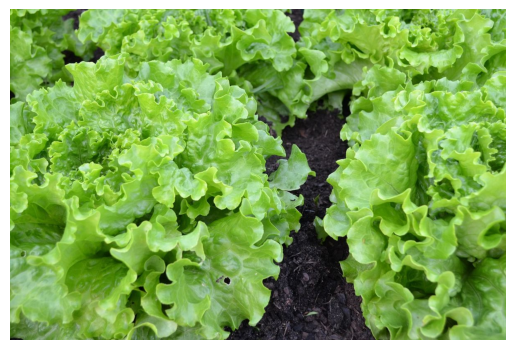

Selada adalah tanaman daun yang cocok ditanam di dataran rendah hingga tinggi, terutama pada suhu sejuk. Tanaman ini memiliki pertumbuhan cepat dan cocok untuk panen cepat. Untuk menanam selada, gunakan tanah yang gembur dan kaya nutrisi, tambahkan pupuk organik, dan pilih lokasi dengan sinar matahari yang cukup. Lakukan penyiraman rutin untuk menjaga kelembapan tanah, tetapi hindari genangan air agar akar tidak membusuk.

- Pucuk Paku


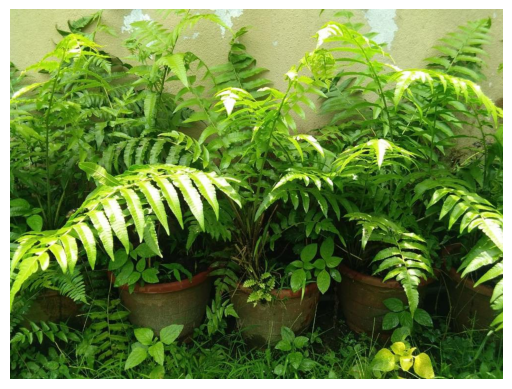

Pucuk paku adalah tanaman yang mudah tumbuh di dataran rendah hingga tinggi, dengan daun muda yang lezat dan kaya gizi. Tanaman ini sering digunakan dalam masakan tradisional. Untuk menanam pucuk paku, pilih tanah yang gembur dan subur, tambahkan pupuk organik seperti kompos, dan pastikan lokasi mendapat cukup sinar matahari. Siram secara teratur untuk menjaga kelembapan tanah, dan lakukan pemangkasan untuk mempercepat pertumbuhan tunas baru yang segar.

- Cabe Rawit


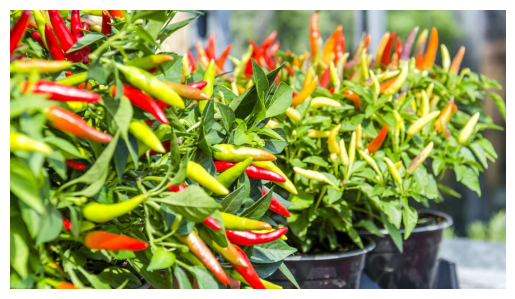

Cabai rawit adalah tanaman yang cocok untuk berbagai ketinggian, dengan buah kecil yang pedas dan banyak digunakan dalam masakan. Tanaman ini sangat produktif dan mudah dirawat. Untuk menanam cabai rawit, gunakan tanah yang subur dan gembur, tambahkan pupuk organik, dan pilih lokasi yang mendapat sinar matahari penuh. Siram secara teratur, terutama di pagi hari, dan pasang penyangga untuk mendukung batang tanaman saat berbuah lebat.



In [ ]:
def recommend_plants(soil_percentage, elevation, dataset_path, image_folder):
    data = pd.read_csv(dataset_path)

    if soil_percentage < 5:
        return "Error: The plantable area is not enough. Please retake the picture."

    if 5 <= soil_percentage < 20:
        filtered_plants = data[data['max_ukuran'] < 1]
    elif 20 <= soil_percentage < 50:
        filtered_plants = data[data['max_ukuran'] < 2]
    else:
        filtered_plants = data

    filtered_plants = filtered_plants[
        (filtered_plants['min_mdpl'] <= elevation) &
        (filtered_plants['max_mdpl'] >= elevation)
    ]

    if filtered_plants.empty:
        return "Error: Currently, there is no plant that fits your data. Please ask the app developer to improve the datasets."

    if len(filtered_plants) > 4:
        filtered_plants = filtered_plants.sample(n=4, random_state=random.randint(0, 1000))

    print(f"Based on the photo you uploaded, you have a plantable area of {soil_percentage}% and an altitude of {elevation} MDPL.\n")
    print("Here are our plant recommendations that can fit your circumstances:\n")

    for _, row in filtered_plants.iterrows():
        plant_name = row['nama_sayuran']
        description = row['penjelasan']
        image_path = os.path.join(image_folder, f"{plant_name}.jpg")

        print(f"- {plant_name}")
        if os.path.exists(image_path):
            img = plt.imread(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        else:
            print("(Image not available)")
        print(f"{description}\n")

recommend_plants(soil_percentage, elevation, dataset_path, image_folder)